<a href="https://colab.research.google.com/github/2239245168/Lab1_Yulin-Yang.ipynb/blob/main/Assignments/Scripts/advise_invest_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AdviseInvest

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data
3. Fit a model
4. Test the accuracy of the model
6.  Use the model to predict on a new dataset (without the target)

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/Scripts/advise_invest_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AdviseInvest Data Dictionary

Variable    |Description |Type    |Code
---- | ------- | ------ | -----
Answered       | Customer response |    Binary    |0: customer did not answer scheduled call; 1: customer answered scheduled call
Income       | Customer income in US dollars|	Numeric
Female       | Customer gender|	Binary	0: female; 1: male
Age	         | Age in years|	Numeric
Job          | Nature of job|	Categorical|	0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer
Num_dependents | Number of people for whom the customer provides maintenance|	Numeric
Rent	| Customer rents	|Binary	|0: no; 1: yes
Own_res	| Customer owns residence|	Binary|	0: no; 1: yes
New_car| Recent new car purchase	|Binary|	New car purchase in the last 3 months: 0: no, 1: yes
Chk_acct | Checking account status	|Categorical|	0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD
Sav_acct	| Average balance in savings account|	Categorical|	0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD
Num_accts	| Number of accounts owned by customer	|Numeric
Mobile	| Mobile phone	|Binary	|0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call
Product| Type of product purchased after conversation with sales rep	|Categorical|	0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan



### Load Libraries

In this class we will be using
- Pandas
- Scikitlearn
- Matplotlib


In [20]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


## Step 1: Initial Data Understanding

 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

In [21]:
import pandas as pd

# 直接从 GitHub 读取 CSV 数据
url = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/Assignments/DataSets/adviseinvest_historical_data.csv"

# 读取数据
historical_data = pd.read_csv(url)

# 显示前几行数据，确认是否加载成功
print(historical_data.head())

   answered  income female  age  job  num_dependents  rent  own_res  new_car  \
0         1   13520      0   23    0               1     1        0      0.0   
1         0   14780      0   22    2               1     0        1      0.0   
2         1   37570      0   62    2               1     0        0      1.0   
3         0   12450      0   33    2               1     0        1      0.0   
4         0   12400      0   48    1               2     0        0      1.0   

   chk_acct  sav_acct  num_accts  mobile  product  
0         0         2          0       1        2  
1         3         0          3       0        0  
2         3         0          4       0        4  
3         1         0          2       0        0  
4         2         1          4       0        0  


In [23]:
# 查看数据类型
print("数据类型:\n", historical_data.dtypes)

数据类型:
 answered            int64
income              int64
female             object
age                 int64
job                 int64
num_dependents      int64
rent                int64
own_res             int64
new_car           float64
chk_acct            int64
sav_acct            int64
num_accts           int64
mobile              int64
product             int64
dtype: object



缺失值统计:
 answered          0
income            0
female            0
age               0
job               0
num_dependents    0
rent              0
own_res           0
new_car           2
chk_acct          0
sav_acct          0
num_accts         0
mobile            0
product           0
dtype: int64

重复行数量: 29035


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32570 (\N{CJK UNIFIED IDEOGRAPH-7F3A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28909 (\N{CJK UNIFIED IDEOGRAPH-70ED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas

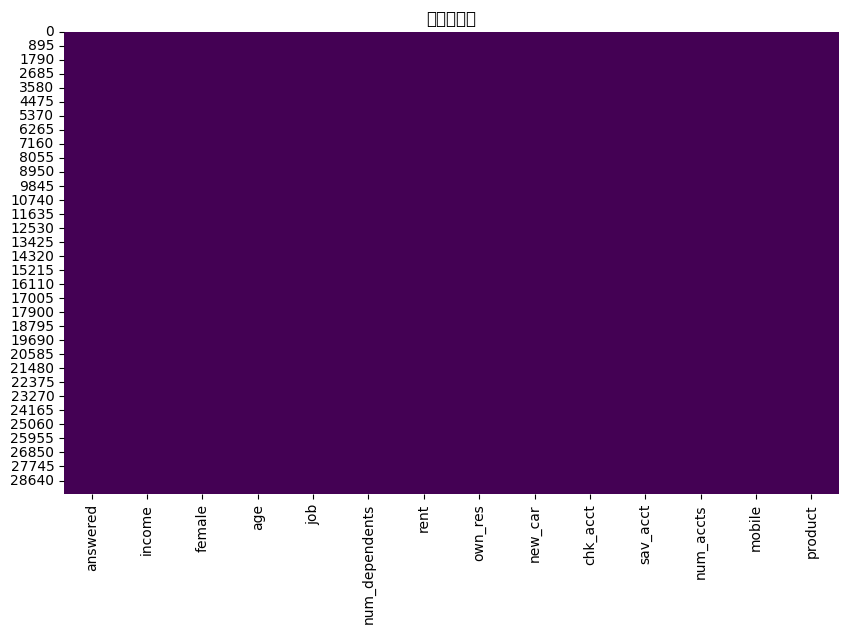

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas

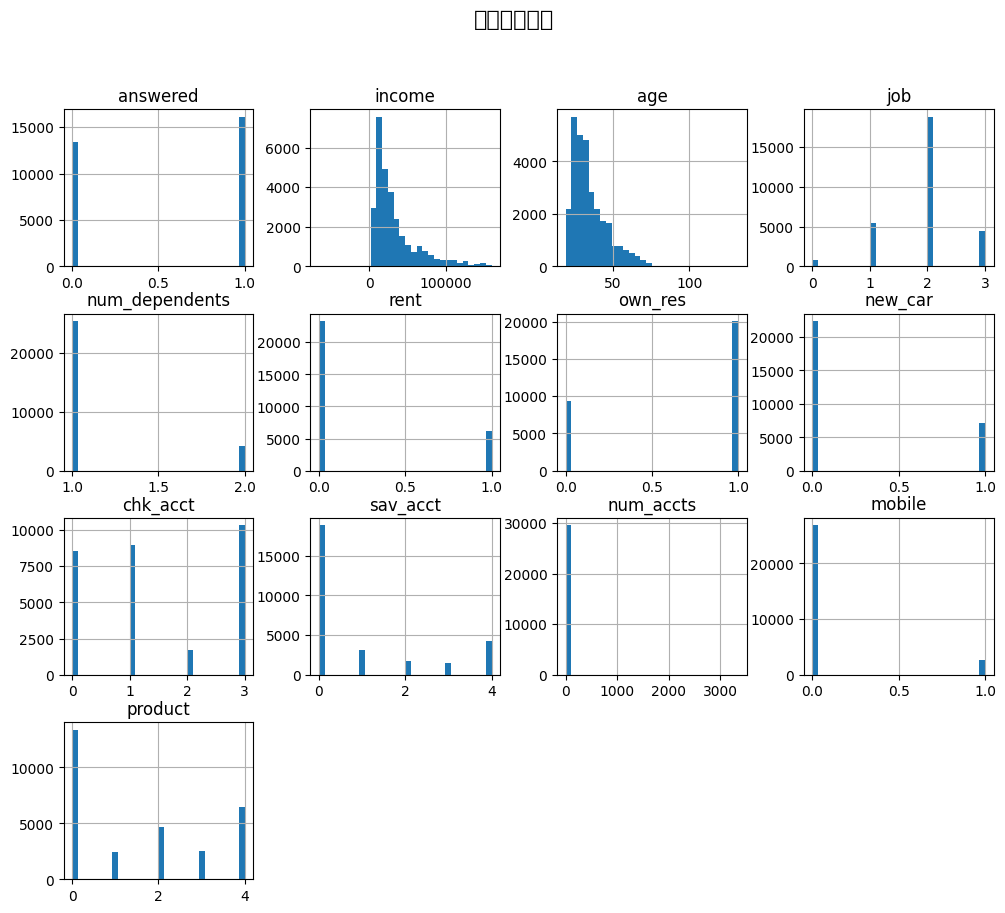

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 检查缺失值
print("\n缺失值统计:\n", historical_data.isnull().sum())

# 检查重复数据
duplicates = historical_data.duplicated().sum()
print("\n重复行数量:", duplicates)

# 可视化缺失值
plt.figure(figsize=(10, 6))
sns.heatmap(historical_data.isnull(), cbar=False, cmap='viridis')
plt.title("缺失值热图")
plt.show()

# 绘制数值特征的分布直方图
historical_data.hist(figsize=(12, 10), bins=30)
plt.suptitle("数值特征分布", fontsize=16)
plt.show()

## Step 2: Data Preparation

### 2.1: Data Cleanup
- Remove any variables that are not relevant to our analysis (if they relate to activity after the answer).
- Clean up the data and put it in a new datafram named "df_clean"


In [26]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/Assignments/DataSets/adviseinvest_historical_data.csv"
historical_data = pd.read_csv(url)

# Print the available columns to verify the correct column name
print(historical_data.columns)

# Drop irrelevant variables (those related to activity after the answer)
# Replace 'Product' with the actual column name if it's different
df_clean = historical_data.drop(columns=['product'])  # Assuming the actual column name is 'product'

# Check if there are any missing values
df_clean = df_clean.dropna()  # Remove rows with missing values

# Remove duplicate rows
df_clean = df_clean.drop_duplicates()

# Reset index after cleaning
df_clean.reset_index(drop=True, inplace=True)

# Display the first few rows of the cleaned dataset
print(df_clean.head())

# Display summary of the cleaned dataset
print(df_clean.info())

# Save the cleaned data
df_clean.to_csv("adviseinvest_cleaned.csv", index=False)

Index(['answered', 'income', 'female', 'age', 'job', 'num_dependents', 'rent',
       'own_res', 'new_car', 'chk_acct', 'sav_acct', 'num_accts', 'mobile',
       'product'],
      dtype='object')
   answered  income female  age  job  num_dependents  rent  own_res  new_car  \
0         1   13520      0   23    0               1     1        0      0.0   
1         0   14780      0   22    2               1     0        1      0.0   
2         1   37570      0   62    2               1     0        0      1.0   
3         0   12450      0   33    2               1     0        1      0.0   
4         0   12400      0   48    1               2     0        0      1.0   

   chk_acct  sav_acct  num_accts  mobile  
0         0         2          0       1  
1         3         0          3       0  
2         3         0          4       0  
3         1         0          2       0  
4         2         1          4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 

### 2.2: Standardize variables

 - Change "answered" to yes/no and make it categorical
 - Convert any variables that should be an integer into an integer

In [29]:
# Recode 'answered' variable: 1 → 'yes', 0 → 'no'
df_clean['answered'] = df_clean['answered'].map({1: 'yes', 0: 'no'}).astype('category') # Changed 'Answered' to 'answered'

# Convert numeric variables to integer if applicable
# Changed 'Income' to 'income', other columns to lowercase to match DataFrame
int_columns = ['income', 'age', 'num_dependents', 'num_accts']
df_clean[int_columns] = df_clean[int_columns].astype(int)

# Display the first few rows after standardization
print(df_clean.head())

# Display data types to confirm changes
print(df_clean.dtypes)

  answered  income female  age  job  num_dependents  rent  own_res  new_car  \
0      NaN   13520      0   23    0               1     1        0      0.0   
1      NaN   14780      0   22    2               1     0        1      0.0   
2      NaN   37570      0   62    2               1     0        0      1.0   
3      NaN   12450      0   33    2               1     0        1      0.0   
4      NaN   12400      0   48    1               2     0        0      1.0   

   chk_acct  sav_acct  num_accts  mobile  
0         0         2          0       1  
1         3         0          3       0  
2         3         0          4       0  
3         1         0          2       0  
4         2         1          4       0  
answered          category
income               int64
female              object
age                  int64
job                  int64
num_dependents       int64
rent                 int64
own_res              int64
new_car            float64
chk_acct             int

### 2.3 Convert variables to categorical

- Find at least 8 variables that would be appropriate to convert to categories

In [31]:
# Convert appropriate variables to categorical
# Corrected column names to match DataFrame column names
categorical_columns = ['answered', 'female', 'job', 'rent', 'own_res', 'new_car',
                       'chk_acct', 'sav_acct', 'mobile']

df_clean[categorical_columns] = df_clean[categorical_columns].astype('category')

# Display the first few rows after conversion
print(df_clean.head())

# Display data types to confirm changes
print(df_clean.dtypes)

  answered  income female  age job  num_dependents rent own_res new_car  \
0      NaN   13520      0   23   0               1    1       0     0.0   
1      NaN   14780      0   22   2               1    0       1     0.0   
2      NaN   37570      0   62   2               1    0       0     1.0   
3      NaN   12450      0   33   2               1    0       1     0.0   
4      NaN   12400      0   48   1               2    0       0     1.0   

  chk_acct sav_acct  num_accts mobile  
0        0        2          0      1  
1        3        0          3      0  
2        3        0          4      0  
3        1        0          2      0  
4        2        1          4      0  
answered          category
income               int64
female            category
age                  int64
job               category
num_dependents       int64
rent              category
own_res           category
new_car           category
chk_acct          category
sav_acct          category
num_accts   

# Step 3: Exploratory Data Analysis (EDA)
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

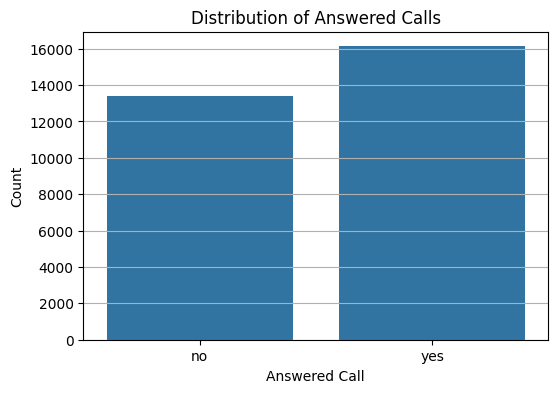

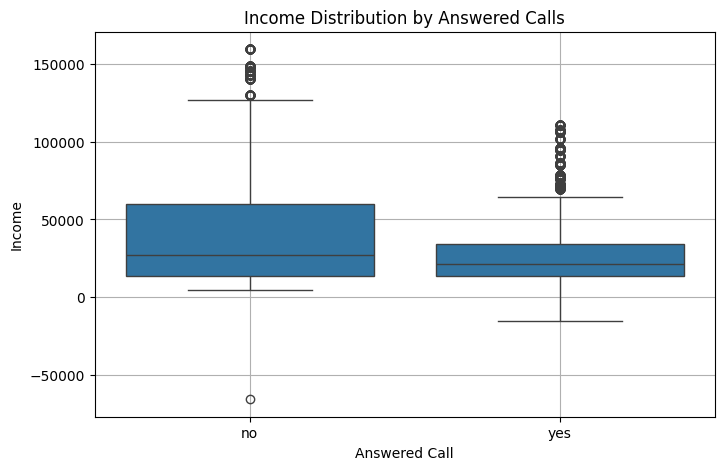

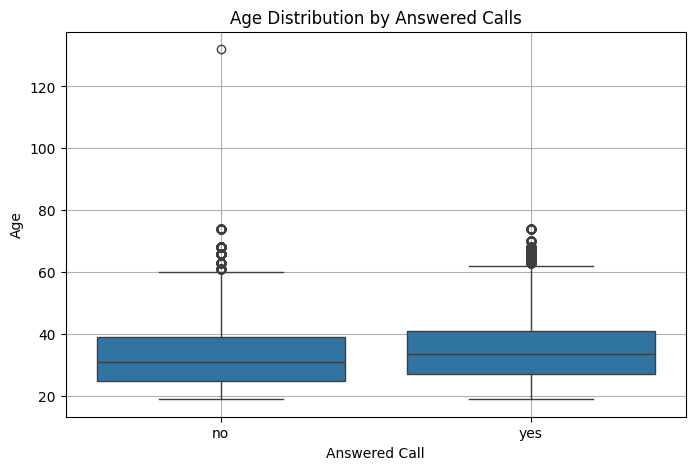

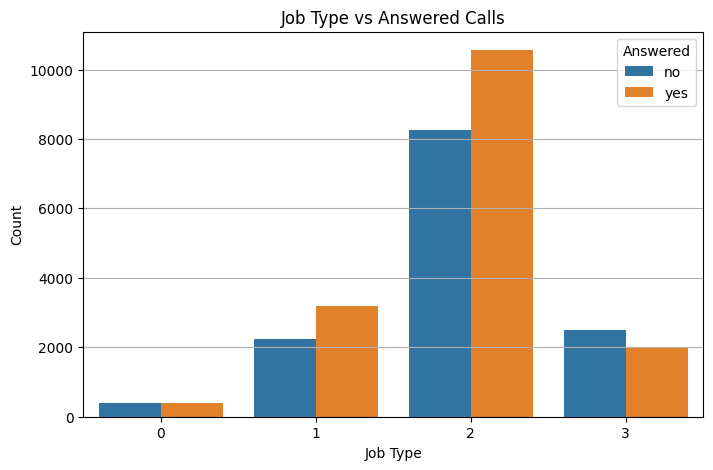

<ipython-input-33-6bc1d06ed562>:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mobile_answered = df_clean.groupby(['Mobile', 'Answered']).size().unstack()


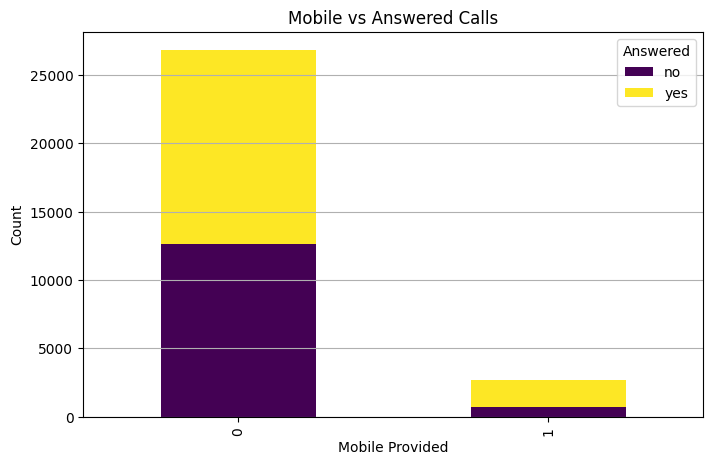

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取上传的数据集
file_path = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/Assignments/DataSets/adviseinvest_historical_data.csv"
df_clean = pd.read_csv(file_path)

# 标准化列名（确保匹配数据集中使用的小写格式）
df_clean.rename(columns={'answered': 'Answered', 'income': 'Income', 'female': 'Female',
                         'age': 'Age', 'job': 'Job', 'num_dependents': 'Num_dependents',
                         'rent': 'Rent', 'own_res': 'Own_res', 'new_car': 'New_car',
                         'chk_acct': 'Chk_acct', 'sav_acct': 'Sav_acct',
                         'num_accts': 'Num_accts', 'mobile': 'Mobile', 'product': 'Product'}, inplace=True)

# 重新编码 'Answered' 变量
df_clean['Answered'] = df_clean['Answered'].map({1: 'yes', 0: 'no'}).astype('category')

# 转换适当的变量为分类变量
categorical_columns = ['Answered', 'Female', 'Job', 'Rent', 'Own_res', 'New_car',
                       'Chk_acct', 'Sav_acct', 'Mobile']
df_clean[categorical_columns] = df_clean[categorical_columns].astype('category')

# 转换数值变量为整数类型
int_columns = ['Income', 'Age', 'Num_dependents', 'Num_accts']
df_clean[int_columns] = df_clean[int_columns].astype(int)

# 生成 EDA 可视化

# 图 1: 'Answered' 的柱状图
plt.figure(figsize=(6, 4))
sns.countplot(x=df_clean['Answered'])
plt.title("Distribution of Answered Calls")
plt.xlabel("Answered Call")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()

# 图 2: 收入（Income） vs. Answered 的箱线图
plt.figure(figsize=(8, 5))
sns.boxplot(x='Answered', y='Income', data=df_clean)
plt.title("Income Distribution by Answered Calls")
plt.xlabel("Answered Call")
plt.ylabel("Income")
plt.grid()
plt.show()

# 图 3: 年龄（Age） vs. Answered 的箱线图
plt.figure(figsize=(8, 5))
sns.boxplot(x='Answered', y='Age', data=df_clean)
plt.title("Age Distribution by Answered Calls")
plt.xlabel("Answered Call")
plt.ylabel("Age")
plt.grid()
plt.show()

# 图 4: 不同工作类别（Job） vs. Answered 的分布
plt.figure(figsize=(8, 5))
sns.countplot(x='Job', hue='Answered', data=df_clean)
plt.title("Job Type vs Answered Calls")
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.legend(title="Answered")
plt.grid(axis='y')
plt.show()

# 图 5: 是否提供手机号码（Mobile） vs. Answered 的堆叠柱状图
mobile_answered = df_clean.groupby(['Mobile', 'Answered']).size().unstack()
mobile_answered.plot(kind='bar', stacked=True, figsize=(8, 5), colormap="viridis")
plt.title("Mobile vs Answered Calls")
plt.xlabel("Mobile Provided")
plt.ylabel("Count")
plt.legend(title="Answered")
plt.grid(axis='y')
plt.show()


## Step 4: Modeling

### 4.1: Calculate the base probability of answering

If we use no model at all, how good is our chance of predicting someone leaving?

In [ ]:
#get the default probability

### 4.2: Split the training and testing datasets

- split df_clean using train_test_split function
- all variables except answered should be in the x variable
- answered is in the y variable


In [ ]:
# Split data into training and testing sets


### 4.3: Create a Decision Tree
- Use all available attributes (except those that were eliminated in step 3)
- It is recommended to use the type "entropy" and a max_depth of 4

In [ ]:
#create a tree

In [ ]:
#display (visualize) the tree

### 4.4: What is the accuracy?

This should be better than the base probability, or you have failed in your objective

In [ ]:
#calculate the probability for your tree

### 4.5: Create a confusion matrix

This will show false positives, true positives, etc.

In [ ]:
#create a basic confusion matrix


Create a more visual, interpretable version of the matrix

In [ ]:
#Create a beautiful matrix; hint - try using Seaborn Heatmap

# Step 5: Evaluate the Model

**Assumptions**

One of the simplifying assumptions we will make in this project is that all the customers who answer the phone will purchase a product. (This assumption is actually verified by the data.) To model "answered" in this case is therefore equivalent to modeling "purchased."

There are costs and benefits in this case. We will assume that customers purchase a product for 100 dollars. This was the average cost of AdviseInvest products, according to the Director of Sales.  Also, as we learned in the interview, the agent time to make the sale is worth 25 dollars. Profit would therefore be \$75 dollars for an answered call and a purchase. In sum:

**Benefit**: True positive. The customer is predicted to answer, does answer, and purchases a product for 100 dollars for a profit of 100 - 25 = 75.

**Cost**: False positive. The customer is predicted to answer, but does not answer, so there is a loss of 25. (We assume the agent cannot schedule another call at the last minute, or spends the entire time slot trying to make the call.)

When you create a calculation you can use:
- True answered * 75 -> These people purchased
- False answered * 25 -> You can't schedule another call

For this exercise, we propose that customers who are not predicted to answer will not be called, so there would be no benefits and no costs for them.  

### 5.1 Calculate the Profit Using the Model

In [ ]:
# Write a calcuation for the profit from your model

### 5.2 Compare to the Default Profit

How much profit (revenue - costs) could be expected if all customers are called? We can consider this a baseline case for profit since it does not require a model.

In other words, to calculate profit in this baseline scenario treat the customers who answer as true positives treat the customers who do not answer as false positives.

In [ ]:
#Write a calculation for the overall profit without using the model (default)

### 5.3 Tune the Model
- Adjust the size or shape of the tree, then test the accuracy
- Continue to make changes until you find a set of hyperparameters that improves the accuracy compared to the initial model

In [ ]:
# Create a new version of the tree with new parameters

In [ ]:
# Calculate a new probability

### 5.4 Apply the Model to New Customers
- Import the "adviseinvest_new_customer_data.csv" file
- Using the tree model, predict each customer for the target variable

In [ ]:
#Import new customer data into a new data frame

In [ ]:
#Predict the number of customers who will be yes/no for the target variable

# Step 6: Plan for Deployment
### 6.1: Did we improve our profit using the model?  

Write your conclusion notes below:

### 6.2: How should the model be deployed?

Write your recommendations below: